**Навигация по уроку**

1. [Библиотеки Python для Data Science](https://colab.research.google.com/drive/1VKRkuVNaSRPy6uNRhWLIlfaTnLPuyWcC)
2. [Практика](https://colab.research.google.com/drive/1jL4XbkAMuMNVPXhfsE8Z2Z4h-sGtyAq1)
3. Домашняя работа

Используя базу данных фильмов из практической части урока, проверте следующие гипотезы:

1. Большинство фильмов выпускаются по пятницам
2. Известные актеры снимаются в самых кассовых фильмах
3. Известные актеры снимаются в самыx дорогих фильмах

Построить графики по гипотезам. Сколько актеров из вашего результата вам знакомы?

In [ ]:
#Напишите свое решение
from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip")

with open('the_movies_dataset.zip', 'wb') as f:
    f.write(response.content)

with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

# Разархивация датасета в директорию 'the_movies_dataset'
!unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset

# Папка с распакованным датасетом
FILE_PATH = './the_movies_dataset'

import os

os.listdir(FILE_PATH)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')
df.head()
print(df['release_date'].unique())

# Преобразуем столбец с датой в формат datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Выводим весь DataFrame
print(df)




['1995-10-30' '1995-12-15' '1995-12-22' ... '1904-03-05' '1991-05-13'
 '1917-10-21']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



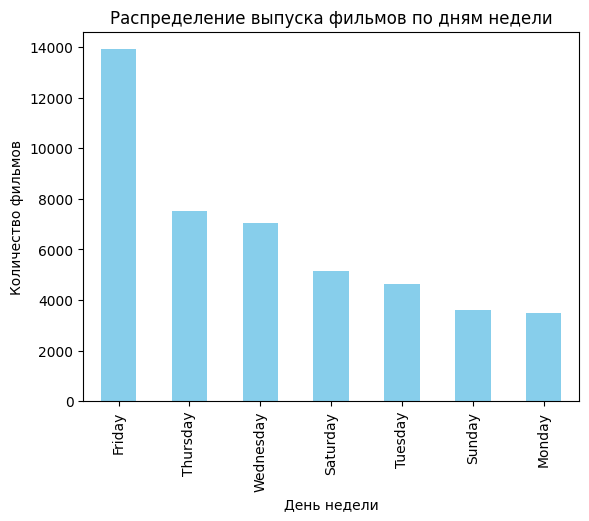

In [ ]:
# Добавим столбец с днем недели
df['weekday'] = df['release_date'].dt.day_name()

# Сгруппируем данные по дням недели и построим график
weekday_counts = df['weekday'].value_counts()
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение выпуска фильмов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество фильмов')
plt.show()


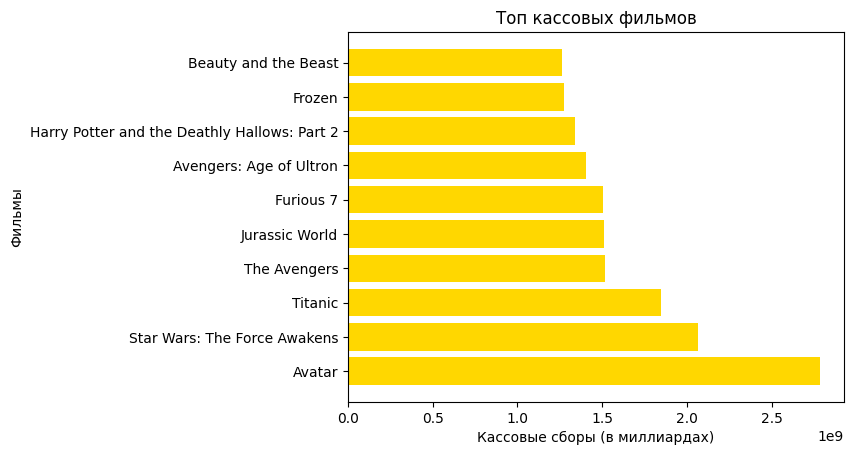

In [ ]:
# Предположим, что df - это DataFrame с вашими данными из базы данных
# Пример:
# df = pd.read_sql_query("SELECT * FROM movies;", your_database_connection)

# Сортируем фильмы по кассовым сборам и выбираем топ N
top_n = 10  # или любое другое число, которое вам интересно
top_movies = df.sort_values(by='revenue', ascending=False).head(top_n)

# Визуализируем топ кассовых фильмов
plt.barh(top_movies['title'], top_movies['revenue'], color='gold')
plt.title('Топ кассовых фильмов')
plt.xlabel('Кассовые сборы (в миллиардах)')
plt.ylabel('Фильмы')
plt.show()


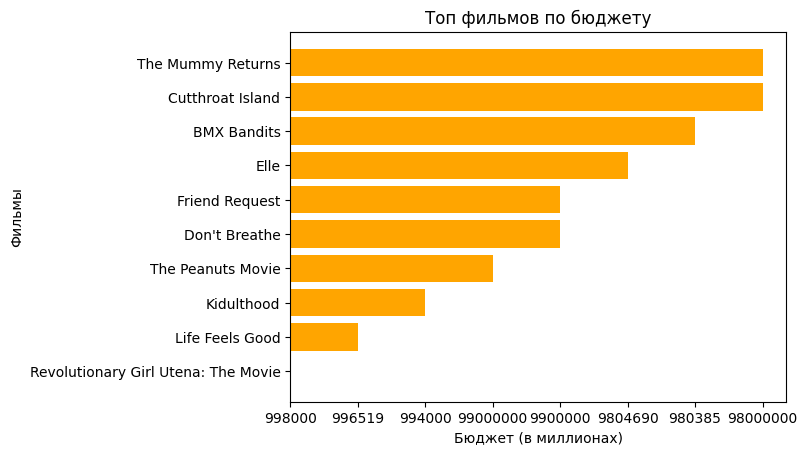

In [ ]:
# Предположим, что df - это DataFrame с вашими данными из базы данных
# Пример:
# df = pd.read_sql_query("SELECT * FROM movies;", your_database_connection)

# Сортируем фильмы по бюджету и выбираем топ N
top_n = 10  # или любое другое число, которое вам интересно
top_budget_movies = df.sort_values(by='budget', ascending=False).head(top_n)

# Визуализируем топ фильмов по бюджету
plt.barh(top_budget_movies['title'], top_budget_movies['budget'], color='orange')
plt.title('Топ фильмов по бюджету')
plt.xlabel('Бюджет (в миллионах)')
plt.ylabel('Фильмы')
plt.show()
